In [2]:
import torch
import torchvision

import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Setup data directory
import pathlib
data_dir = pathlib.Path("data")

In [3]:
# Get training data
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              # transform=transforms.ToTensor(),
                              download=True)

# Get testing data
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             # transform=transforms.ToTensor(),
                             download=True)

In [4]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: data
    split=train

In [5]:
class_names = train_data.classes
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

churros


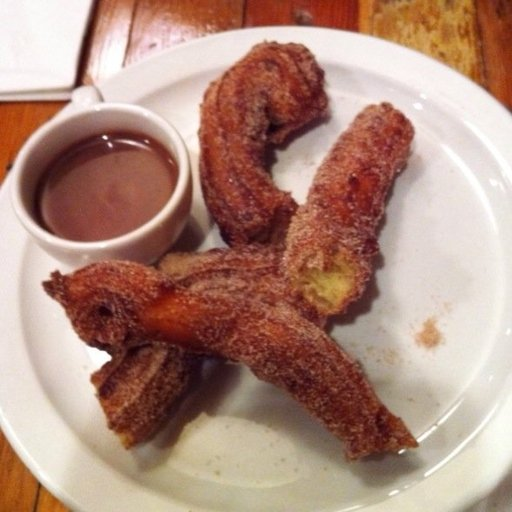

In [6]:
# View first sample (PIL Image format)
print(class_names[train_data[0][1]])
train_data[0][0]

In [11]:
len(class_names)

101

In [12]:
# Get random 10% of training images
import random

# Setup data paths
data_path = data_dir / "food-101" / "images"
target_classes = class_names

# Change amount of data to get (e.g. 0.1 = random 10%, 0.2 = random 20%)
amount_to_get = 1.0

# Create function to separate a random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"], 
               target_classes=class_names,
               amount=0.1,
               seed=42):
    random.seed(42)
    label_splits = {}
    
    # Get labels
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
        with open(label_path, "r") as f:
            labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes] 
        
        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)
        
        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits
        
label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 75750 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 25250 images for test...


[PosixPath('data/food-101/images/chicken_quesadilla/2670687.jpg'),
 PosixPath('data/food-101/images/beef_tartare/2507172.jpg'),
 PosixPath('data/food-101/images/greek_salad/1260996.jpg'),
 PosixPath('data/food-101/images/french_toast/3917826.jpg'),
 PosixPath('data/food-101/images/foie_gras/1035427.jpg'),
 PosixPath('data/food-101/images/clam_chowder/2402986.jpg'),
 PosixPath('data/food-101/images/cheese_plate/75029.jpg'),
 PosixPath('data/food-101/images/sushi/2019344.jpg'),
 PosixPath('data/food-101/images/ceviche/1648055.jpg'),
 PosixPath('data/food-101/images/panna_cotta/357026.jpg')]

In [13]:
# Create target directory path
target_dir_name = f"data/food-101_{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: 'data/food-101_100_percent'


In [ ]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying data/food-101/images/chicken_quesadilla/2670687.jpg to data/food-101_100_percent/train/chicken_quesadilla/2670687.jpg...
[INFO] Copying data/food-101/images/beef_tartare/2507172.jpg to data/food-101_100_percent/train/beef_tartare/2507172.jpg...
[INFO] Copying data/food-101/images/greek_salad/1260996.jpg to data/food-101_100_percent/train/greek_salad/1260996.jpg...
[INFO] Copying data/food-101/images/french_toast/3917826.jpg to data/food-101_100_percent/train/french_toast/3917826.jpg...
[INFO] Copying data/food-101/images/foie_gras/1035427.jpg to data/food-101_100_percent/train/foie_gras/1035427.jpg...
[INFO] Copying data/food-101/images/clam_chowder/2402986.jpg to data/food-101_100_percent/train/clam_chowder/2402986.jpg...
[INFO] Copying data/food-101/images/cheese_plate/75029.jpg to data/food-101_100_percent/train/cheese_plate/75029.jpg...
[INFO] Copying data/food-101/images/sushi/2019344.jpg to data/food-101_100_percent/train/sushi/2019344.jpg...
[INFO] Copying data/fo

In [15]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
walk_through_dir(target_dir)

There are 2 directories and 0 images in 'data/food-101_100_percent'.
There are 101 directories and 0 images in 'data/food-101_100_percent/test'.
There are 0 directories and 250 images in 'data/food-101_100_percent/test/peking_duck'.
There are 0 directories and 250 images in 'data/food-101_100_percent/test/chicken_quesadilla'.
There are 0 directories and 250 images in 'data/food-101_100_percent/test/grilled_salmon'.
There are 0 directories and 250 images in 'data/food-101_100_percent/test/beef_carpaccio'.
There are 0 directories and 250 images in 'data/food-101_100_percent/test/caesar_salad'.
There are 0 directories and 250 images in 'data/food-101_100_percent/test/hot_and_sour_soup'.
There are 0 directories and 250 images in 'data/food-101_100_percent/test/breakfast_burrito'.
There are 0 directories and 250 images in 'data/food-101_100_percent/test/nachos'.
There are 0 directories and 250 images in 'data/food-101_100_percent/test/tacos'.
There are 0 directories and 250 images in 'data/

In [7]:
# Get random 10% of training images
import random

# Setup data paths
data_path = data_dir / "food-101" / "images"
target_classes = ["pizza", "steak", "sushi"]

# Change amount of data to get (e.g. 0.1 = random 10%, 0.2 = random 20%)
amount_to_get = 1.0

# Create function to separate a random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"], 
               target_classes=["pizza", "steak", "sushi"],
               amount=0.1,
               seed=42):
    random.seed(42)
    label_splits = {}
    
    # Get labels
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
        with open(label_path, "r") as f:
            labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes] 
        
        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)
        
        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits
        
label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 2250 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 750 images for test...


[PosixPath('data/food-101/images/pizza/3269634.jpg'),
 PosixPath('data/food-101/images/pizza/1524655.jpg'),
 PosixPath('data/food-101/images/steak/2825100.jpg'),
 PosixPath('data/food-101/images/steak/225990.jpg'),
 PosixPath('data/food-101/images/steak/1839481.jpg'),
 PosixPath('data/food-101/images/pizza/38349.jpg'),
 PosixPath('data/food-101/images/pizza/3018077.jpg'),
 PosixPath('data/food-101/images/sushi/93139.jpg'),
 PosixPath('data/food-101/images/pizza/2702825.jpg'),
 PosixPath('data/food-101/images/sushi/200025.jpg')]

In [8]:
# Create target directory path
target_dir_name = f"data/pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: 'data/pizza_steak_sushi_100_percent'


In [9]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying data/food-101/images/pizza/3269634.jpg to data/pizza_steak_sushi_100_percent/train/pizza/3269634.jpg...
[INFO] Copying data/food-101/images/pizza/1524655.jpg to data/pizza_steak_sushi_100_percent/train/pizza/1524655.jpg...
[INFO] Copying data/food-101/images/steak/2825100.jpg to data/pizza_steak_sushi_100_percent/train/steak/2825100.jpg...
[INFO] Copying data/food-101/images/steak/225990.jpg to data/pizza_steak_sushi_100_percent/train/steak/225990.jpg...
[INFO] Copying data/food-101/images/steak/1839481.jpg to data/pizza_steak_sushi_100_percent/train/steak/1839481.jpg...
[INFO] Copying data/food-101/images/pizza/38349.jpg to data/pizza_steak_sushi_100_percent/train/pizza/38349.jpg...
[INFO] Copying data/food-101/images/pizza/3018077.jpg to data/pizza_steak_sushi_100_percent/train/pizza/3018077.jpg...
[INFO] Copying data/food-101/images/sushi/93139.jpg to data/pizza_steak_sushi_100_percent/train/sushi/93139.jpg...
[INFO] Copying data/food-101/images/pizza/2702825.jpg to d

In [10]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
walk_through_dir(target_dir)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_100_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_100_percent/test'.
There are 0 directories and 250 images in 'data/pizza_steak_sushi_100_percent/test/sushi'.
There are 0 directories and 250 images in 'data/pizza_steak_sushi_100_percent/test/steak'.
There are 0 directories and 250 images in 'data/pizza_steak_sushi_100_percent/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_100_percent/train'.
There are 0 directories and 750 images in 'data/pizza_steak_sushi_100_percent/train/sushi'.
There are 0 directories and 750 images in 'data/pizza_steak_sushi_100_percent/train/steak'.
There are 0 directories and 750 images in 'data/pizza_steak_sushi_100_percent/train/pizza'.
